In [1]:
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns

sns.set()

In [17]:
account = pd.read_csv('account.csv',delimiter=',')
account

,account_id,district_id,frequency,date
0,576,55,POPLATEK MESICNE,930101
1,3818,74,POPLATEK MESICNE,930101
2,704,55,POPLATEK MESICNE,930101
3,2378,16,POPLATEK MESICNE,930101
4,2632,24,POPLATEK MESICNE,930102
...,...,...,...,...
4495,124,55,POPLATEK MESICNE,971228
4496,3958,59,POPLATEK MESICNE,971228
4497,777,30,POPLATEK MESICNE,971228
4498,1573,63,POPLATEK MESICNE,971229


In [18]:
account.isnull().sum()

account_id     0
district_id    0
frequency      0
date           0
dtype: int64

In [19]:

account = account.rename (columns= {"date":"account_date"})
account['frequency'].replace('POPLATEK MESICNE','MONTHLY',inplace =True)
account['frequency'].replace('POPLATEK TYDNE','WEEKLY',inplace = True)
account['frequency'].replace('POPLATEK PO OBRATU','ISSU_AF_TRANS',inplace =True)

In [20]:
account['account_date']=pd.to_datetime('19' + account.account_date.astype(int).astype(str), format="%Y%m%d")

In [21]:
account

,account_id,district_id,frequency,account_date
0,576,55,MONTHLY,1993-01-01
1,3818,74,MONTHLY,1993-01-01
2,704,55,MONTHLY,1993-01-01
3,2378,16,MONTHLY,1993-01-01
4,2632,24,MONTHLY,1993-01-02
...,...,...,...,...
4495,124,55,MONTHLY,1997-12-28
4496,3958,59,MONTHLY,1997-12-28
4497,777,30,MONTHLY,1997-12-28
4498,1573,63,MONTHLY,1997-12-29


In [22]:
account['frequency'].value_counts()

MONTHLY          4167
WEEKLY            240
ISSU_AF_TRANS      93
Name: frequency, dtype: int64

In [23]:
account['account_date'].value_counts()

1993-02-08    13
1993-10-08    12
1996-06-25    11
1996-11-24    11
1993-06-08    10
              ..
1993-07-19     1
1994-09-09     1
1994-09-25     1
1995-07-07     1
1993-12-23     1
Name: account_date, Length: 1535, dtype: int64

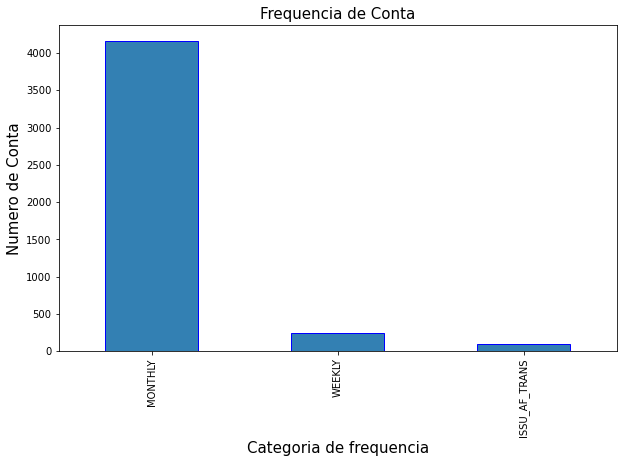

In [24]:
len_account= np.arange(len(account['account_id']))
plt.rcParams['figure.figsize']=(10,6)
plt.title('Frequencia de Conta',fontsize='15')
plt.ylabel('Numero de Conta',fontsize='15')
plt.xlabel('Categoria de frequencia',fontsize='15')
account['frequency'].value_counts().plot(kind='bar', edgecolor ='blue',color = (0.2,0.5,0.7))
plt.show()

<AxesSubplot:xlabel='frequency', ylabel='account_id'>

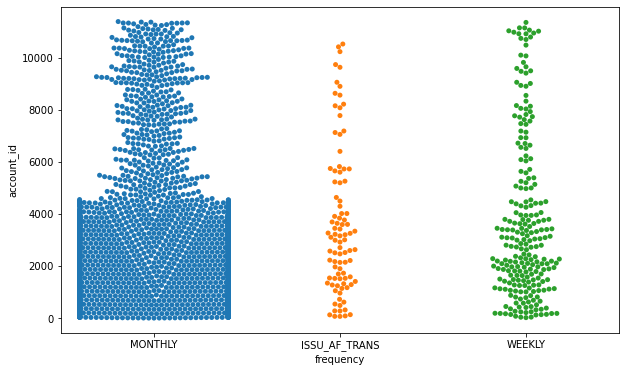

In [25]:
sns.swarmplot(x=account["frequency"],y=account["account_id"])

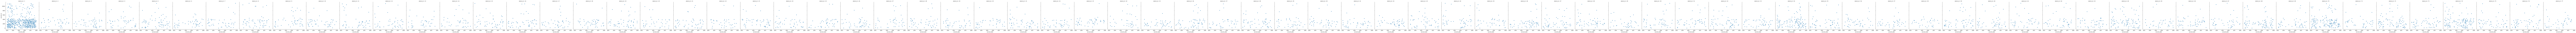

In [26]:
#sns.lmplot(data=account,x='account_id', y='district_id',col='account_date')
#Apply the defailt theme 
sns.relplot(data=account,x='account_date',y='account_id',col='district_id')


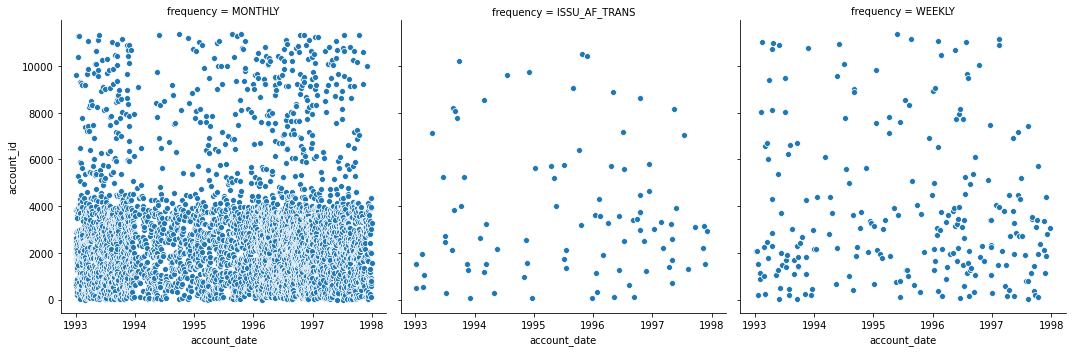

In [27]:
sns.relplot(data=account,x='account_date', y='account_id',col='frequency')

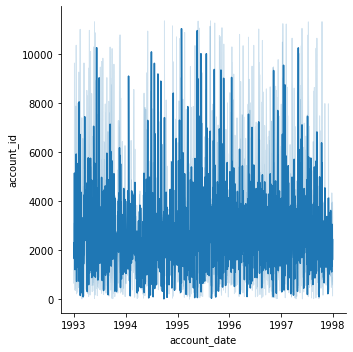

In [28]:
sns.relplot(data=account,kind="line",x="account_date",y="account_id")

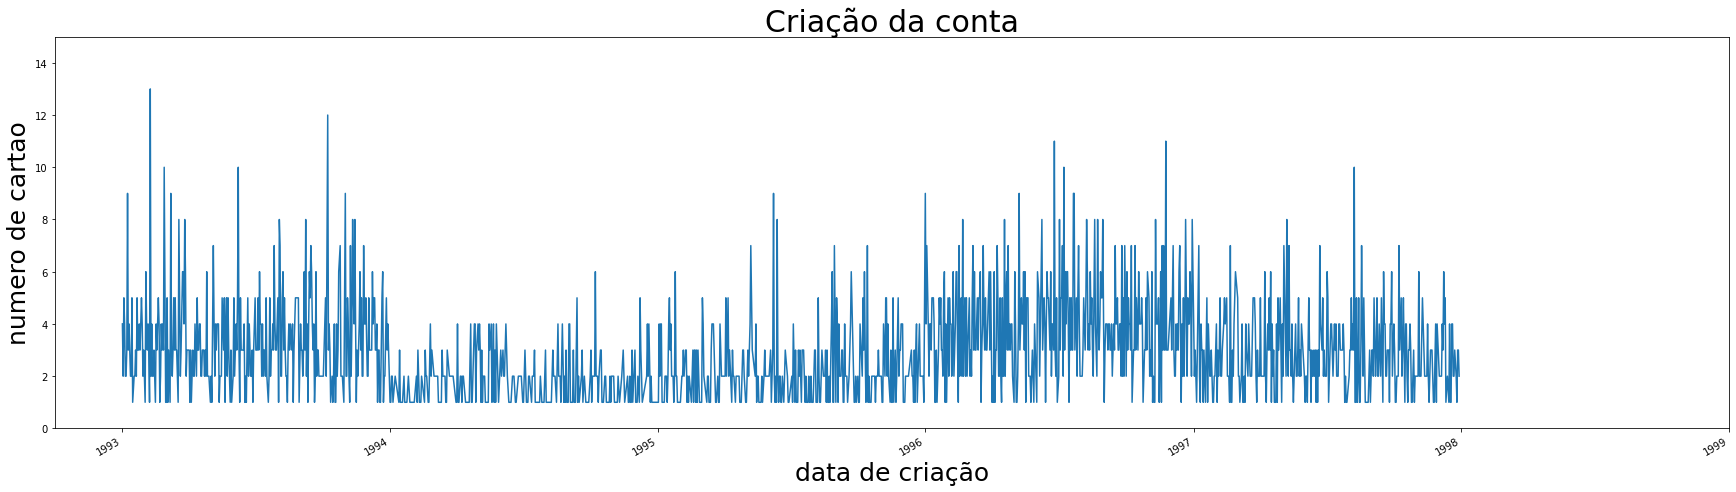

In [29]:
datenow = datetime(1999,1,1)
datestart = datetime(1992,10,1)
plt.rcParams['figure.figsize']=(30,8)
plt.title('Criação da conta',fontsize='30')
plt.ylabel('numero de cartao',fontsize='25')
plt.xlabel('data de criação',fontsize='25')
plt.ylim(0,15)
plt.xlim(datestart,datenow)
account['account_date'].value_counts().plot()
plt.show()